In [1]:
%run ../input/python-recipes/dhtml.py
dhtml('Data')

In [2]:
import pandas as pd,pylab as pl
colors=['#3636ff','#ff3636','#36ff36',
        '#ff36ff','#ffff36','#36ffff']
user='https://raw.githubusercontent.com/OlgaBelitskaya/'
path='machine_learning_engineer_nd009/'+\
     'master/Machine_Learning_Engineer_ND_P3/'
data=pd.read_csv(user+path+'customers.csv')

In [3]:
%run ../input/python-recipes/dhtml.py
dhtml('Plotting Style - "a Couple of Code Rows"')

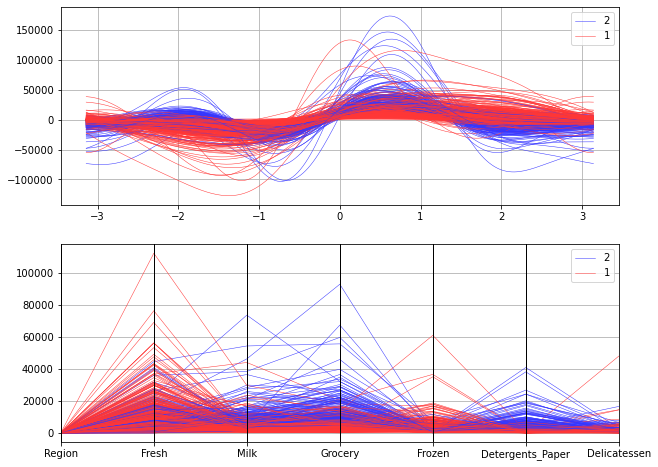

In [4]:
fig=pl.figure(figsize=(10,8))
ax1=fig.add_subplot('211')
params={'frame':data,'class_column':'Channel',
        'lw':.5,'color':colors}
pd.plotting.andrews_curves(**params,ax=ax1)
ax2=fig.add_subplot('212')
pd.plotting.parallel_coordinates(**params,ax=ax2);

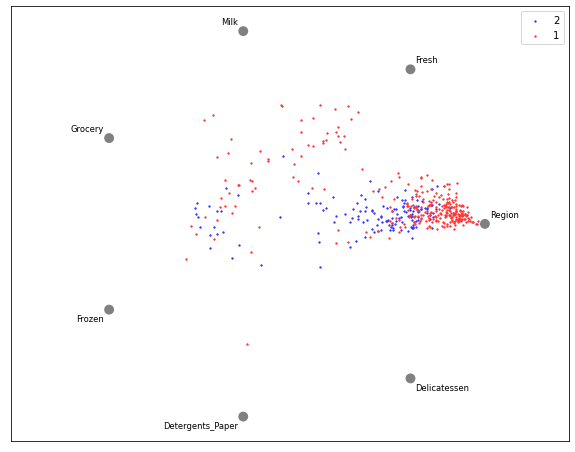

In [5]:
pl.figure(figsize=(10,8))
pd.plotting.radviz(**params,s=3)
pl.xticks([]); pl.yticks([]); 

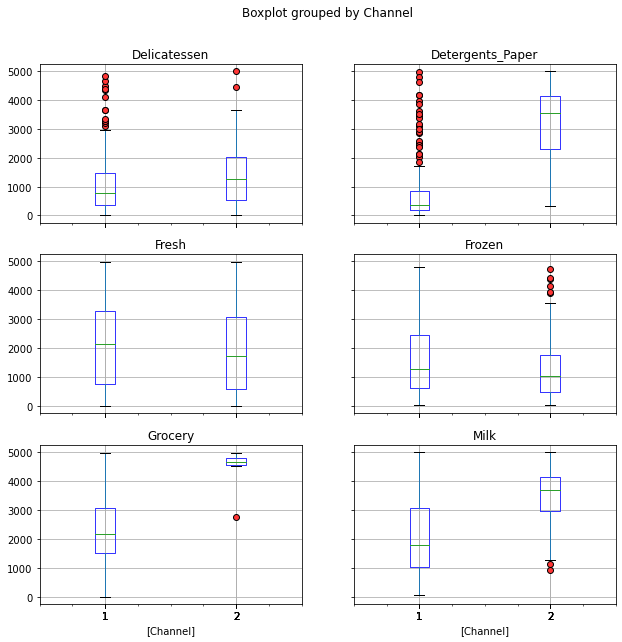

In [6]:
data[data<5000].drop('Region',axis=1)\
.boxplot(by='Channel',figsize=(10,10),
         boxprops={'color':colors[0]},
         flierprops={'markerfacecolor':colors[1]});

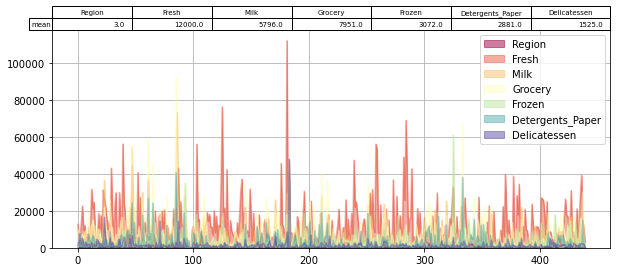

In [7]:
fig=pl.figure(figsize=(10,4))
ax=fig.add_subplot('111')
data.iloc[:,int(1):].plot.area(
    stacked=False,ax=ax,cmap='Spectral')
data_mean=pd.DataFrame(
    data.iloc[:,int(1):].mean().round()).T
data_mean.index=['mean']
pd.plotting.table(ax,data_mean,loc='top')
pl.grid();

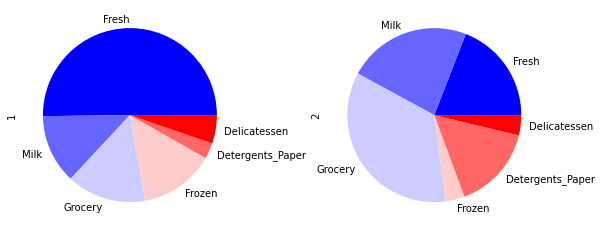

In [8]:
data.drop('Region',axis=1).groupby('Channel').sum().T\
.plot.pie(subplots=True,figsize=(10,4),
          legend=False,cmap='bwr');

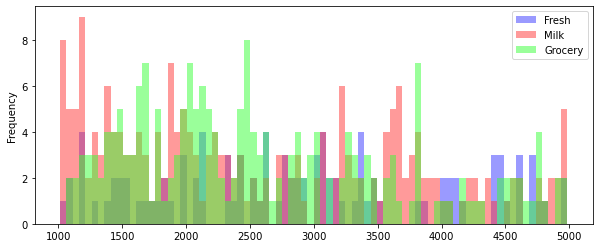

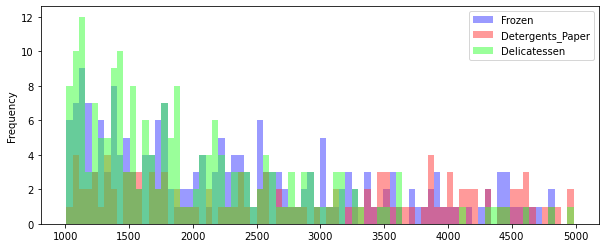

In [9]:
data_range=data.iloc[:,2:][(data<5000)&(data>1000)]
params={'bins':80,'alpha':.5,
        'figsize':(10,4),'color':colors}
data_range.iloc[:,:3].plot.hist(**params)
data_range.iloc[:,3:].plot.hist(**params);